In [1]:
import fastf1
from fastf1.ergast import Ergast

In [2]:
def get_drivers_standings():
    ergast = Ergast()
    standings = ergast.get_driver_standings(season=2023)
    return standings.content[0]


In [3]:
def calculate_max_points_for_remaining_season():
    POINTS_FOR_SPRINT = 8 + 25 + 1  # Winning the sprint, race and fastest lap
    POINTS_FOR_CONVENTIONAL = 25 + 1  # Winning the race and fastest lap

    events = fastf1.events.get_events_remaining(backend="ergast")
    # Count how many sprints and conventional races are left
    sprint_events = len(events.loc[events["EventFormat"] == "sprint_shootout"])
    conventional_events = len(events.loc[events["EventFormat"] == "conventional"])

    # Calculate points for each
    sprint_points = sprint_events * POINTS_FOR_SPRINT
    conventional_points = conventional_events * POINTS_FOR_CONVENTIONAL

    return sprint_points + conventional_points

In [4]:
def calculate_who_can_win(driver_standings, max_points):
    LEADER_POINTS = int(driver_standings.loc[0]['points'])

    for i, _ in enumerate(driver_standings.iterrows()):
        driver = driver_standings.loc[i]
        driver_max_points = int(driver["points"]) + max_points
        can_win = 'No' if driver_max_points < LEADER_POINTS else 'Yes'

        print(f"{driver['position']}: {driver['givenName'] + ' ' + driver['familyName']}, "
              f"Current points: {driver['points']}, "
              f"Theoretical max points: {driver_max_points}, "
              f"Can win: {can_win}")

In [5]:
# Get the current drivers standings
driver_standings = get_drivers_standings()

# Get the maximum amount of points
points = calculate_max_points_for_remaining_season()

# Print which drivers can still win
calculate_who_can_win(driver_standings, points)

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/ravisolanki/Library/Caches/fastf1.
	Size: 1.32 GB


1: Max Verstappen, Current points: 575.0, Theoretical max points: 575, Can win: Yes
2: Sergio Pérez, Current points: 285.0, Theoretical max points: 285, Can win: No
3: Lewis Hamilton, Current points: 234.0, Theoretical max points: 234, Can win: No
4: Fernando Alonso, Current points: 206.0, Theoretical max points: 206, Can win: No
5: Charles Leclerc, Current points: 206.0, Theoretical max points: 206, Can win: No
6: Lando Norris, Current points: 205.0, Theoretical max points: 205, Can win: No
7: Carlos Sainz, Current points: 200.0, Theoretical max points: 200, Can win: No
8: George Russell, Current points: 175.0, Theoretical max points: 175, Can win: No
9: Oscar Piastri, Current points: 97.0, Theoretical max points: 97, Can win: No
10: Lance Stroll, Current points: 74.0, Theoretical max points: 74, Can win: No
11: Pierre Gasly, Current points: 62.0, Theoretical max points: 62, Can win: No
12: Esteban Ocon, Current points: 58.0, Theoretical max points: 58, Can win: No
13: Alexander Albon

In [29]:
print(df_points)


   Driver  Year  Points
0     RIC  2018       0
1     BOT  2018       0
2     RAI  2018       0
3     HAM  2018       0
4     VER  2018       0
..    ...   ...     ...
95    ERI  2022       0
96    GRO  2022       0
97    GAS  2022       0
98    LEC  2022       0
99    HAR  2022       0

[100 rows x 3 columns]


In [30]:
import time
from fastf1.ergast import Ergast

# Initialize the Ergast API
ergast = Ergast()

def get_driver_points_by_year(driver_code, year):
    # Get the race schedule for the season
    races = ergast.get_race_schedule(season=year)
    total_points = 0

    # Loop through each race in the schedule
    for race in races.itertuples():
        time.sleep(1)  # Adding delay to avoid rate limiting
        # Fetch the results for each race
        race_results = ergast.get_race_results(season=year, round=race.round)
        
        # Directly using the race_results content
        race_results_data = race_results.content

        # Debugging: Print the structure of race_results_data
        print(f"Data for race {race.round}: {race_results_data}")

        # Loop through the race_results_data
        for result in race_results_data:
            if 'Driver' in result and 'points' in result:
                if result['Driver']['code'] == driver_code:
                    points = float(result['points'])
                    total_points += points
                    # Debugging: Print the points for each race
                    print(f"Driver {driver_code} in race {race.round}: {points} points")

    # Debugging: Print the total points after all races
    print(f"Total points for driver {driver_code} in {year}: {total_points}")
    return total_points

# Test the function for a specific driver and year
points = get_driver_points_by_year("HAM", 2018)
print(f"Total points for HAM in 2018: {points}")


Request for URL https://ergast.com/api/f1/2018/races.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
Request for URL https://ergast.com/api/f1/2018/1/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-package

Data for race 1: [    number  position positionText  points  grid  laps    status  \
0        5         1            1    25.0     3    58  Finished   
1       44         2            2    18.0     1    58  Finished   
2        7         3            3    15.0     2    58  Finished   
3        3         4            4    12.0     8    58  Finished   
4       14         5            5    10.0    10    58  Finished   
5       33         6            6     8.0     4    58  Finished   
6       27         7            7     6.0     7    58  Finished   
7       77         8            8     4.0    15    58  Finished   
8        2         9            9     2.0    11    58  Finished   
9       55        10           10     1.0     9    58  Finished   
10      11        11           11     0.0    12    58  Finished   
11      31        12           12     0.0    14    58  Finished   
12      16        13           13     0.0    18    58  Finished   
13      18        14           14     0.0   

Request for URL https://ergast.com/api/f1/2018/2/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 2: [    number  position positionText  points  grid  laps      status  \
0        5         1            1    25.0     1    57    Finished   
1       77         2            2    18.0     3    57    Finished   
2       44         3            3    15.0     9    57    Finished   
3       10         4            4    12.0     5    57    Finished   
4       20         5            5    10.0     6    57    Finished   
5       27         6            6     8.0     7    57    Finished   
6       14         7            7     6.0    13    56      +1 Lap   
7        2         8            8     4.0    14    56      +1 Lap   
8        9         9            9     2.0    17    56      +1 Lap   
9       31        10           10     1.0     8    56      +1 Lap   
10      55        11           11     0.0    10    56      +1 Lap   
11      16        12           12     0.0    19    56      +1 Lap   
12       8        13           13     0.0    16    56      +1 Lap   
13      18      

Request for URL https://ergast.com/api/f1/2018/3/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 3: [    number  position positionText  points  grid  laps            status  \
0        3         1            1    25.0     6    56          Finished   
1       77         2            2    18.0     3    56          Finished   
2        7         3            3    15.0     2    56          Finished   
3       44         4            4    12.0     4    56          Finished   
4       33         5            5    10.0     5    56          Finished   
5       27         6            6     8.0     7    56          Finished   
6       14         7            7     6.0    13    56          Finished   
7        5         8            8     4.0     1    56          Finished   
8       55         9            9     2.0     9    56          Finished   
9       20        10           10     1.0    11    56          Finished   
10      31        11           11     0.0    12    56          Finished   
11      11        12           12     0.0     8    56          Finished   
12     

Request for URL https://ergast.com/api/f1/2018/4/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 4: [    number  position positionText  points  grid  laps     status  \
0       44         1            1    25.0     2    51   Finished   
1        7         2            2    18.0     6    51   Finished   
2       11         3            3    15.0     8    51   Finished   
3        5         4            4    12.0     1    51   Finished   
4       55         5            5    10.0     9    51   Finished   
5       16         6            6     8.0    13    51   Finished   
6       14         7            7     6.0    12    51   Finished   
7       18         8            8     4.0    10    51   Finished   
8        2         9            9     2.0    16    51   Finished   
9       28        10           10     1.0    19    51   Finished   
10       9        11           11     0.0    18    51   Finished   
11      10        12           12     0.0    17    51   Finished   
12      20        13           13     0.0    15    51   Finished   
13      77        14          

Request for URL https://ergast.com/api/f1/2018/5/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 5: [    number  position positionText  points  grid  laps     status  \
0       44         1            1    25.0     1    66   Finished   
1       77         2            2    18.0     2    66   Finished   
2       33         3            3    15.0     5    66   Finished   
3        5         4            4    12.0     3    66   Finished   
4        3         5            5    10.0     6    66   Finished   
5       20         6            6     8.0     7    65     +1 Lap   
6       55         7            7     6.0     9    65     +1 Lap   
7       14         8            8     4.0     8    65     +1 Lap   
8       11         9            9     2.0    15    64    +2 Laps   
9       16        10           10     1.0    14    64    +2 Laps   
10      18        11           11     0.0    18    64    +2 Laps   
11      28        12           12     0.0    20    64    +2 Laps   
12       9        13           13     0.0    17    64    +2 Laps   
13      35        14          

Request for URL https://ergast.com/api/f1/2018/6/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 6: [    number  position positionText  points  grid  laps     status  \
0        3         1            1    25.0     1    78   Finished   
1        5         2            2    18.0     2    78   Finished   
2       44         3            3    15.0     3    78   Finished   
3        7         4            4    12.0     4    78   Finished   
4       77         5            5    10.0     5    78   Finished   
5       31         6            6     8.0     6    78   Finished   
6       10         7            7     6.0    10    78   Finished   
7       27         8            8     4.0    11    78   Finished   
8       33         9            9     2.0    20    78   Finished   
9       55        10           10     1.0     8    78   Finished   
10       9        11           11     0.0    16    78   Finished   
11      11        12           12     0.0     9    78   Finished   
12      20        13           13     0.0    19    78   Finished   
13       2        14          

Request for URL https://ergast.com/api/f1/2018/7/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 7: [    number  position positionText  points  grid  laps     status  \
0        5         1            1    25.0     1    68   Finished   
1       77         2            2    18.0     2    68   Finished   
2       33         3            3    15.0     3    68   Finished   
3        3         4            4    12.0     6    68   Finished   
4       44         5            5    10.0     4    68   Finished   
5        7         6            6     8.0     5    68   Finished   
6       27         7            7     6.0     7    67     +1 Lap   
7       55         8            8     4.0     9    67     +1 Lap   
8       31         9            9     2.0     8    67     +1 Lap   
9       16        10           10     1.0    13    67     +1 Lap   
10      10        11           11     0.0    16    67     +1 Lap   
11       8        12           12     0.0    20    67     +1 Lap   
12      20        13           13     0.0    11    67     +1 Lap   
13      11        14          

Request for URL https://ergast.com/api/f1/2018/8/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 8: [    number  position positionText  points  grid  laps     status  \
0       44         1            1    25.0     1    53   Finished   
1       33         2            2    18.0     4    53   Finished   
2        7         3            3    15.0     6    53   Finished   
3        3         4            4    12.0     5    53   Finished   
4        5         5            5    10.0     3    53   Finished   
5       20         6            6     8.0     9    53   Finished   
6       77         7            7     6.0     2    53   Finished   
7       55         8            8     4.0     7    53   Finished   
8       27         9            9     2.0    12    53   Finished   
9       16        10           10     1.0     8    53   Finished   
10       8        11           11     0.0    10    52     +1 Lap   
11       2        12           12     0.0    17    52     +1 Lap   
12       9        13           13     0.0    15    52     +1 Lap   
13      28        14          

Request for URL https://ergast.com/api/f1/2018/9/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 9: [    number  position positionText  points  grid  laps            status  \
0       33         1            1    25.0     4    71          Finished   
1        7         2            2    18.0     3    71          Finished   
2        5         3            3    15.0     6    71          Finished   
3        8         4            4    12.0     5    70            +1 Lap   
4       20         5            5    10.0     8    70            +1 Lap   
5       31         6            6     8.0    11    70            +1 Lap   
6       11         7            7     6.0    16    70            +1 Lap   
7       14         8            8     4.0    13    70            +1 Lap   
8       16         9            9     2.0    18    70            +1 Lap   
9        9        10           10     1.0    20    70            +1 Lap   
10      10        11           11     0.0    12    70            +1 Lap   
11      55        12           12     0.0     9    70            +1 Lap   
12     

Request for URL https://ergast.com/api/f1/2018/10/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 10: [    number  position positionText  points  grid  laps      status  \
0        5         1            1    25.0     2    52    Finished   
1       44         2            2    18.0     1    52    Finished   
2        7         3            3    15.0     3    52    Finished   
3       77         4            4    12.0     4    52    Finished   
4        3         5            5    10.0     6    52    Finished   
5       27         6            6     8.0    11    52    Finished   
6       31         7            7     6.0    10    52    Finished   
7       14         8            8     4.0    13    52    Finished   
8       20         9            9     2.0     7    52    Finished   
9       11        10           10     1.0    12    52    Finished   
10       2        11           11     0.0    17    52    Finished   
11      18        12           12     0.0    19    52    Finished   
12      10        13           13     0.0    14    52    Finished   
13      35     

Request for URL https://ergast.com/api/f1/2018/11/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 11: [    number  position positionText  points  grid  laps    status  \
0       44         1            1    25.0    14    67  Finished   
1       77         2            2    18.0     2    67  Finished   
2        7         3            3    15.0     3    67  Finished   
3       33         4            4    12.0     4    67  Finished   
4       27         5            5    10.0     7    67  Finished   
5        8         6            6     8.0     6    67  Finished   
6       11         7            7     6.0    10    67  Finished   
7       31         8            8     4.0    15    67  Finished   
8        9         9            9     2.0    13    67  Finished   
9       28        10           10     1.0    17    67  Finished   
10      20        11           11     0.0     5    67  Finished   
11      55        12           12     0.0     8    67  Finished   
12       2        13           13     0.0    19    67  Finished   
13      10        14           14     0.0  

Request for URL https://ergast.com/api/f1/2018/12/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 12: [    number  position positionText  points  grid  laps      status  \
0       44         1            1    25.0     1    70    Finished   
1        5         2            2    18.0     4    70    Finished   
2        7         3            3    15.0     3    70    Finished   
3        3         4            4    12.0    12    70    Finished   
4       77         5            5    10.0     2    70    Finished   
5       10         6            6     8.0     6    70    Finished   
6       20         7            7     6.0     9    69      +1 Lap   
7       14         8            8     4.0    11    69      +1 Lap   
8       55         9            9     2.0     5    69      +1 Lap   
9        8        10           10     1.0    10    69      +1 Lap   
10      28        11           11     0.0     8    69      +1 Lap   
11      27        12           12     0.0    13    69      +1 Lap   
12      31        13           13     0.0    18    69      +1 Lap   
13      11     

Request for URL https://ergast.com/api/f1/2018/13/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 13: [    number  position positionText  points  grid  laps    status  \
0        5         1            1    25.0     2    44  Finished   
1       44         2            2    18.0     1    44  Finished   
2       33         3            3    15.0     7    44  Finished   
3       77         4            4    12.0    19    44  Finished   
4       11         5            5    10.0     4    44  Finished   
5       31         6            6     8.0     3    44  Finished   
6        8         7            7     6.0     5    44  Finished   
7       20         8            8     4.0     9    44  Finished   
8       10         9            9     2.0    10    44  Finished   
9        9        10           10     1.0    13    43    +1 Lap   
10      55        11           11     0.0    14    43    +1 Lap   
11      35        12           12     0.0    16    43    +1 Lap   
12      18        13           13     0.0    17    43    +1 Lap   
13      28        14           14     0.0  

Request for URL https://ergast.com/api/f1/2018/14/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 14: [    number  position positionText  points  grid  laps        status  \
0       44         1            1    25.0     3    53      Finished   
1        7         2            2    18.0     1    53      Finished   
2       77         3            3    15.0     4    53      Finished   
3        5         4            4    12.0     2    53      Finished   
4       33         5            5    10.0     5    53      Finished   
5       31         6            6     8.0     8    53      Finished   
6       11         7            7     6.0    14    53      Finished   
7       55         8            8     4.0     7    53      Finished   
8       18         9            9     2.0    10    52        +1 Lap   
9       35        10           10     1.0    12    52        +1 Lap   
10      16        11           11     0.0    15    52        +1 Lap   
11       2        12           12     0.0    17    52        +1 Lap   
12      27        13           13     0.0    20    52     

Request for URL https://ergast.com/api/f1/2018/15/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 15: [    number  position positionText  points  grid  laps     status  \
0       44         1            1    25.0     1    61   Finished   
1       33         2            2    18.0     2    61   Finished   
2        5         3            3    15.0     3    61   Finished   
3       77         4            4    12.0     4    61   Finished   
4        7         5            5    10.0     5    61   Finished   
5        3         6            6     8.0     6    61   Finished   
6       14         7            7     6.0    11    61   Finished   
7       55         8            8     4.0    12    60     +1 Lap   
8       16         9            9     2.0    13    60     +1 Lap   
9       27        10           10     1.0    10    60     +1 Lap   
10       9        11           11     0.0    14    60     +1 Lap   
11       2        12           12     0.0    18    60     +1 Lap   
12      10        13           13     0.0    15    60     +1 Lap   
13      18        14         

Request for URL https://ergast.com/api/f1/2018/16/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 16: [    number  position positionText  points  grid  laps    status  \
0       44         1            1    25.0     2    53  Finished   
1       77         2            2    18.0     1    53  Finished   
2        5         3            3    15.0     3    53  Finished   
3        7         4            4    12.0     4    53  Finished   
4       33         5            5    10.0    19    53  Finished   
5        3         6            6     8.0    18    53  Finished   
6       16         7            7     6.0     7    53  Finished   
7       20         8            8     4.0     5    52    +1 Lap   
8       31         9            9     2.0     6    52    +1 Lap   
9       11        10           10     1.0     8    52    +1 Lap   
10       8        11           11     0.0     9    52    +1 Lap   
11      27        12           12     0.0    12    52    +1 Lap   
12       9        13           13     0.0    10    52    +1 Lap   
13      14        14           14     0.0  

Request for URL https://ergast.com/api/f1/2018/17/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 17: [    number  position positionText  points  grid  laps            status  \
0       44         1            1    25.0     1    53          Finished   
1       77         2            2    18.0     2    53          Finished   
2       33         3            3    15.0     3    53          Finished   
3        3         4            4    12.0    15    53          Finished   
4        7         5            5    10.0     4    53          Finished   
5        5         6            6     8.0     8    53          Finished   
6       11         7            7     6.0     9    53          Finished   
7        8         8            8     4.0     5    53          Finished   
8       31         9            9     2.0    11    53          Finished   
9       55        10           10     1.0    13    52            +1 Lap   
10      10        11           11     0.0     7    52            +1 Lap   
11       9        12           12     0.0    20    52            +1 Lap   
12    

Request for URL https://ergast.com/api/f1/2018/18/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 18: [    number  position positionText  points  grid  laps            status  \
0        7         1            1    25.0     2    56          Finished   
1       33         2            2    18.0    18    56          Finished   
2       44         3            3    15.0     1    56          Finished   
3        5         4            4    12.0     5    56          Finished   
4       77         5            5    10.0     3    56          Finished   
5       27         6            6     8.0     7    56          Finished   
6       55         7            7     6.0    11    56          Finished   
7       11         8            8     4.0    10    56          Finished   
8       28         9            9     2.0    20    55            +1 Lap   
9        9        10           10     1.0    16    55            +1 Lap   
10       2        11           11     0.0    17    55            +1 Lap   
11      10        12           12     0.0    19    55            +1 Lap   
12    

Request for URL https://ergast.com/api/f1/2018/19/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 19: [    number  position positionText  points  grid  laps      status  \
0       33         1            1    25.0     2    71    Finished   
1        5         2            2    18.0     4    71    Finished   
2        7         3            3    15.0     6    71    Finished   
3       44         4            4    12.0     3    71    Finished   
4       77         5            5    10.0     5    70      +1 Lap   
5       27         6            6     8.0     7    69     +2 Laps   
6       16         7            7     6.0     9    69     +2 Laps   
7        2         8            8     4.0    15    69     +2 Laps   
8        9         9            9     2.0    10    69     +2 Laps   
9       10        10           10     1.0    20    69     +2 Laps   
10      31        11           11     0.0    11    69     +2 Laps   
11      18        12           12     0.0    17    69     +2 Laps   
12      35        13           13     0.0    19    69     +2 Laps   
13      28     

Request for URL https://ergast.com/api/f1/2018/20/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 20: [    number  position positionText  points  grid  laps       status  \
0       44         1            1    25.0     1    71     Finished   
1       33         2            2    18.0     5    71     Finished   
2        7         3            3    15.0     4    71     Finished   
3        3         4            4    12.0    11    71     Finished   
4       77         5            5    10.0     3    71     Finished   
5        5         6            6     8.0     2    71     Finished   
6       16         7            7     6.0     7    71     Finished   
7        8         8            8     4.0     8    71     Finished   
8       20         9            9     2.0    10    71     Finished   
9       11        10           10     1.0    12    70       +1 Lap   
10      28        11           11     0.0    16    70       +1 Lap   
11      55        12           12     0.0    15    70       +1 Lap   
12      10        13           13     0.0     9    70       +1 Lap   
1

Request for URL https://ergast.com/api/f1/2018/21/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h


Data for race 21: [    number  position positionText  points  grid  laps      status  \
0       44         1            1    25.0     1    55    Finished   
1        5         2            2    18.0     3    55    Finished   
2       33         3            3    15.0     6    55    Finished   
3        3         4            4    12.0     5    55    Finished   
4       77         5            5    10.0     2    55    Finished   
5       55         6            6     8.0    11    55    Finished   
6       16         7            7     6.0     8    55    Finished   
7       11         8            8     4.0    14    55    Finished   
8        8         9            9     2.0     7    54      +1 Lap   
9       20        10           10     1.0    13    54      +1 Lap   
10      14        11           11     0.0    15    54      +1 Lap   
11      28        12           12     0.0    16    54      +1 Lap   
12      18        13           13     0.0    20    54      +1 Lap   
13       2     

In [32]:
import time
from fastf1.ergast import Ergast

# Initialize the Ergast API
ergast = Ergast()

def get_driver_points_by_year(driver_code, year):
    # Get the race schedule for the season
    races = ergast.get_race_schedule(season=year)
    total_points = 0

    # Loop through each race in the schedule
    for race in races.itertuples():
        time.sleep(1)  # Adding delay to avoid rate limiting
        # Fetch the results for each race
        race_results = ergast.get_race_results(season=year, round=race.round)
        
        # Extract the race data from race_results
        race_data = race_results.content

        # Check if race_data is a DataFrame and contains the necessary columns
        if isinstance(race_data, pd.DataFrame) and 'Driver.code' in race_data.columns and 'points' in race_data.columns:
            # Print the DataFrame for debugging
            print(f"DataFrame for race {race.round}:\n{race_data}\n")

            # Filter for the specific driver and sum points
            driver_data = race_data[race_data['Driver.code'] == driver_code]
            if not driver_data.empty:
                race_points = driver_data['points'].astype(float).sum()
                total_points += race_points

    print(f"Total points for driver {driver_code} in {year}: {total_points}")
    return total_points

# Test the function for a specific driver and year
points = get_driver_points_by_year("HAM", 2018)
print(f"Total points for HAM in 2018: {points}")


Request for URL https://ergast.com/api/f1/2018/races.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
Request for URL https://ergast.com/api/f1/2018/1/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-package

Request for URL https://ergast.com/api/f1/2018/11/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
Request for URL https://ergast.com/api/f1/2018/12/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-p

Total points for driver HAM in 2018: 0
Total points for HAM in 2018: 0


In [34]:
import time
from fastf1.ergast import Ergast

# Initialize the Ergast API
ergast = Ergast()

def get_driver_points_for_2018(driver_code):
    total_points = 0

    # Assuming there are up to 23 races in the season
    for round_number in range(1, 24):
        time.sleep(1)  # Adding delay to avoid rate limiting
        # Fetch the results for each race of 2018
        race_results = ergast.get_race_results(season=2018, round=round_number)
        
        # Extract the race data from race_results
        race_data = race_results.content

        # Check if race_data is a DataFrame and contains the necessary columns
        if isinstance(race_data, pd.DataFrame) and 'Driver.code' in race_data.columns and 'points' in race_data.columns:
            # Filter for the specific driver and sum points
            driver_data = race_data[race_data['Driver.code'] == driver_code]
            if not driver_data.empty:
                race_points = driver_data['points'].astype(float).sum()
                total_points += race_points

    return total_points

# Example: Get total points for each driver in 2018
driver_codes = ["HAM", "VET", "VER"]
for driver in driver_codes:
    points = get_driver_points_for_2018(driver)
    print(f"Total points for {driver} in 2018: {points}")


Request for URL https://ergast.com/api/f1/2018/1/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
Request for URL https://ergast.com/api/f1/2018/2/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-pac

Request for URL https://ergast.com/api/f1/2018/12/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 255, in _resend
    response = self._send_and_cache(request, actions, cached_response, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/requests_cache/session.py", line 229, in _send_and_cache
    response = super().send(request, **kwargs)
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 122, in send
    lim.limit()
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-packages/fastf1/req.py", line 99, in limit
    raise RateLimitExceededError(self._info)
fastf1.req.RateLimitExceededError: ergast.com: 200 calls/h
Request for URL https://ergast.com/api/f1/2018/13/results.json failed; using cached response
Traceback (most recent call last):
  File "/Users/ravisolanki/anaconda3/lib/python3.10/site-p

RateLimitExceededError: ergast.com: 200 calls/h

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_f1_data(year):
    url = f"https://www.formula1.com/en/results.html/{year}/drivers.html"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Error retrieving data for {year}")
        return pd.DataFrame()

    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'resultsarchive-table'})

    headers = [th.text.strip() for th in table.find_all('th')]
    rows = table.find_all('tr')
    data = [[td.text.strip() for td in row.find_all('td')] for row in rows[1:]]

    return pd.DataFrame(data, columns=headers)

all_years_data = pd.DataFrame()

for year in range(2018, 2023):
    year_data = scrape_f1_data(year)
    year_data['Year'] = year  # Adding a column for the year
    all_years_data = pd.concat([all_years_data, year_data], ignore_index=True)

print(all_years_data.head())


# all_years_data.to_csv('f1_drivers_points_2018_2022.csv', index=False)


    Pos                  Driver Nationality                        Car  PTS    \
0     1    Lewis\nHamilton\nHAM         GBR                   Mercedes  408     
1     2  Sebastian\nVettel\nVET         GER                    Ferrari  320     
2     3    Kimi\nRäikkönen\nRAI         FIN                    Ferrari  251     
3     4    Max\nVerstappen\nVER         NED  Red Bull Racing TAG Heuer  249     
4     5   Valtteri\nBottas\nBOT         FIN                   Mercedes  247     

   Year  
0  2018  
1  2018  
2  2018  
3  2018  
4  2018  


In [2]:
print(all_years_data)

       Pos                  Driver Nationality                           Car  \
0        1    Lewis\nHamilton\nHAM         GBR                      Mercedes   
1        2  Sebastian\nVettel\nVET         GER                       Ferrari   
2        3    Kimi\nRäikkönen\nRAI         FIN                       Ferrari   
3        4    Max\nVerstappen\nVER         NED     Red Bull Racing TAG Heuer   
4        5   Valtteri\nBottas\nBOT         FIN                      Mercedes   
..  ..  ..                     ...         ...                           ...   
101     18       Zhou\nGuanyu\nZHO         CHN            Alfa Romeo Ferrari   
102     19   Alexander\nAlbon\nALB         THA             Williams Mercedes   
103     20   Nicholas\nLatifi\nLAT         CAN             Williams Mercedes   
104     21     Nyck\nDe Vries\nDEV         NED             Williams Mercedes   
105     22   Nico\nHulkenberg\nHUL         GER  Aston Martin Aramco Mercedes   

     PTS     Year  
0    408     2018  

In [3]:
all_years_data.to_csv('f1_drivers_points_2018_2022.csv', index=False)


              Year  Average Speed   Average RPM  Average Throttle  \
count    75.000000      75.000000     75.000000         75.000000   
mean   2019.826667     189.870885   9752.146332         61.012571   
std       1.473856       9.720541    428.944742          2.746146   
min    2018.000000     158.470554   8089.442579         54.238368   
25%    2018.000000     185.335946   9654.916434         59.137292   
50%    2020.000000     189.503829   9894.936846         60.961289   
75%    2021.000000     197.482382   9983.782344         62.835204   
max    2022.000000     205.837408  10483.926861         66.634994   

       Average Brake         PTS  
count      75.000000   75.000000  
mean        0.216005  126.073333  
std         0.029298  123.432570  
min         0.157496    0.000000  
25%         0.194615   35.500000  
50%         0.213673   75.000000  
75%         0.223928  224.500000  
max         0.312369  454.000000  


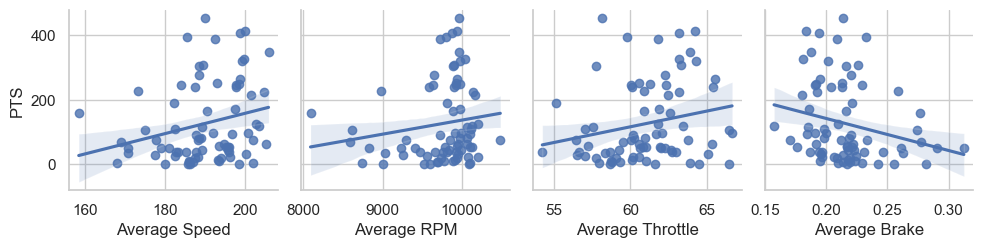

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
telemetry_data_path = '/Users/ravisolanki/Desktop/seasons_driver_year_summary.csv'  # replace with your file path
points_data_path = '/Users/ravisolanki/Desktop/final_ordered_f1_points 2.csv'     

# Read the datasets
telemetry_data = pd.read_csv(telemetry_data_path)
points_data = pd.read_csv(points_data_path)

# Merge the datasets on 'Driver' and 'Year'
merged_data = pd.merge(telemetry_data, points_data, on=['Driver', 'Year'])

# Drop rows with missing values
cleaned_data = merged_data.dropna()

# Perform a basic exploratory data analysis
# Summary statistics of the cleaned data
summary_statistics = cleaned_data.describe()

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Pairplot to visualize the relationships between telemetry variables and points
sns.pairplot(cleaned_data, y_vars=['PTS'], x_vars=['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake'], kind='reg')

# Display the summary statistics
print(summary_statistics)

# Show the pairplot
plt.show()


In [51]:
telemetry_data = pd.read_csv(telemetry_data_path)
points_data = pd.read_csv(points_data_path)

# Merge the datasets on 'Driver' and 'Year'
merged_data = pd.merge(telemetry_data, points_data, on=['Driver', 'Year'])

# Drop rows with missing values
cleaned_data = merged_data.dropna()

# Perform a linear regression model without any training or splitting
model = LinearRegression()
features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Fitting the model with the entire dataset
model.fit(features, target)

r_squared = model.score(features, target)

# Displaying the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:", coefficients)
print("Model Intercept:", intercept)
print("R-squared:", r_squared)


Model Coefficients: [ 2.49107309e+00 -7.40764412e-02  6.40466478e+00 -1.19914779e+03]
Model Intercept: 243.75232602724924
R-squared: 0.10789959566094276


In [52]:
# what do the Coefficients tell us;
#Average Speed 2.49;  Average RPM -0.074;  Average Throttle 6.40;  Average Brake -1199.1477

#the expected mean value of the dependent variable (the points earned by a driver)when all the independent variables
#(predictors like 'Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake') are set to zero
#Which does not make sense.

#in terms of absolute values, Average Brake has the largest absolute value of the coefficient
#(-1199.14779), indicating that it has the strongest effect on the points earned by a driver.
#the negative sign suggests that a higher average braking is associated with fewer points earned, which 
#could imply that more time spent braking might be indicative of a slower lap, hence fewer points.


#Average Throttle' with a coefficient of 6.40466478. This positive value indicates that an increase in 
#the average throttle is associated with an increase in the points earned by a driver. It suggests that
#being on the throttle more often (which could correlate with higher speeds and better performance on track) 
#tends to lead to better results in races, thus potentially earning more points.

In [57]:
print(cleaned_data)

   Driver  Year  Average Speed   Average RPM  Average Throttle  Average Brake  \
0     RIC  2018     197.366052   9970.516777         61.865386       0.186282   
1     BOT  2018     197.598712   9929.169709         62.349072       0.190706   
2     RAI  2018     193.037145   9926.649804         60.551875       0.212537   
3     HAM  2018     198.810854   9877.647430         63.180578       0.194048   
4     VER  2018     198.508862   9975.154331         61.304473       0.191522   
..    ...   ...            ...           ...               ...            ...   
90    OCO  2022     187.687087   9726.696500         60.153533       0.220321   
91    PER  2022     188.546988   9893.468215         57.764369       0.216409   
93    STR  2022     187.424127   9741.841372         57.725972       0.219838   
97    GAS  2022     188.247603  10071.746768         60.173496       0.196493   
98    LEC  2022     189.503829   9894.936846         63.331040       0.226105   

      PTS  
0   170.0  
1  

In [61]:
telemetry_data = pd.read_csv(telemetry_data_path)
points_data = pd.read_csv(points_data_path)

# Merge the datasets on 'Driver' and 'Year'
merged_data = pd.merge(telemetry_data, points_data, on=['Driver', 'Year'])

# Drop rows with missing values
cleaned_data = merged_data.dropna()


# Define features and target
features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the Linear Regression model
model = LinearRegression()

# Perform 10-fold cross-validation
cv_scores = cross_val_score(model, scaled_features, target, cv=10)

# Calculate the average of the cross-validation scores
average_cv_score = cv_scores.mean()

print("Average CV Score:", average_cv_score)

Average CV Score: -2.2773089894241543


In [56]:
telemetry_data = pd.read_csv(telemetry_data_path)
points_data = pd.read_csv(points_data_path)

# Merge the datasets on 'Driver' and 'Year'
merged_data = pd.merge(telemetry_data, points_data, on=['Driver', 'Year'])

# Drop rows with missing values
cleaned_data = merged_data.dropna()


# Features and Target
features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R²: ", r2)

RMSE:  126.3535660689216
R²:  -0.08165993064856703


In [59]:
telemetry_data = pd.read_csv(telemetry_data_path)
points_data = pd.read_csv(points_data_path)

# Merge the datasets on 'Driver' and 'Year'
merged_data = pd.merge(telemetry_data, points_data, on=['Driver', 'Year'])

# Drop rows with missing values
cleaned_data = merged_data.dropna()


# Features and Target
features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Create a Random Forest model
model = RandomForestRegressor()

# Fit the model with the entire dataset
model.fit(scaled_features, target)

# Predicting on the scaled features
predictions = model.predict(scaled_features)

# Evaluating the model
rmse = mean_squared_error(target, predictions, squared=False)
r2 = r2_score(target, predictions)

print("RMSE: ", rmse)
print("R-squared: ", r2)

RMSE:  44.571954466906654
R-squared:  0.8678420301674092


In [64]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, scaled_features, target, cv=5, scoring='r2')

# Calculate the average of the CV scores
average_cv_score = np.mean(cv_scores)

# Display the result
print("Average CV Score:", average_cv_score)

Average CV Score: -0.16455244052520893


In [66]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

features = cleaned_data[['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake']]
target = cleaned_data['PTS']

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize the Random Forest model
rf_model = RandomForestRegressor()

# Perform 5-fold cross-validation using RMSE (Root Mean Squared Error)
cv_scores = cross_val_score(rf_model, scaled_features, target, cv=5, scoring='neg_root_mean_squared_error')

# Convert the scores to positive values (as they are negated in scikit-learn)
cv_scores = -cv_scores

# Calculate the average of the CV scores
average_cv_score = np.mean(cv_scores)

# Display the result
print("Average CV Score (RMSE):", average_cv_score)


Average CV Score (RMSE): 129.10807806068388


In [ ]:
#The slight improvement in RMSE and R² indicates that including polynomial features does capture more 
#complexity in the data than a simple linear approach. However, the model is still not performing well
#The negative R² value in both linear and polynomial regressions suggests that these models might not be
#well-suited for your data. It's possible that the relationship between the telemetry data and points won 
#is more complex

In [ ]:
#Now we run a Random Forest model

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating a Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

# Print the RMSE and R² for Random Forest Regression
print("RMSE (Random Forest Regression): ", rmse_rf)
print("R² (Random Forest Regression): ", r2_rf)


RMSE (Random Forest Regression):  70.98755209542021
R² (Random Forest Regression):  0.17372664592196985


In [ ]:
#Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating a Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)

# Training the model
gb_model.fit(X_train, y_train)

# Predicting on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluating the model
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

# Print the RMSE and R² for Gradient Boosting Regression
print("RMSE (Gradient Boosting Regression): ", rmse_gb)
print("R² (Gradient Boosting Regression): ", r2_gb)


RMSE (Gradient Boosting Regression):  72.17014204752506
R² (Gradient Boosting Regression):  0.14596736409239008


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 5.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


In [26]:
pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 9.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 13.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.8 

Note: you may need to restart the kernel to use updated packages.


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_scaled.shape[1], activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model
loss = model.evaluate(X_test, y_test)


Epoch 1/100
8/8 [==============================] - 0s 810us/step - loss: 19793.1055
Epoch 2/100
8/8 [==============================] - 0s 629us/step - loss: 16749.1816
Epoch 3/100
8/8 [==============================] - 0s 706us/step - loss: 14524.9512
Epoch 4/100
8/8 [==============================] - 0s 698us/step - loss: 13054.0146
Epoch 5/100
8/8 [==============================] - 0s 719us/step - loss: 12597.4736
Epoch 6/100
8/8 [==============================] - 0s 678us/step - loss: 12387.5635
Epoch 7/100
8/8 [==============================] - 0s 791us/step - loss: 12501.0811
Epoch 8/100
8/8 [==============================] - 0s 727us/step - loss: 12440.4600
Epoch 9/100
8/8 [==============================] - 0s 799us/step - loss: 12422.6816
Epoch 10/100
8/8 [==============================] - 0s 684us/step - loss: 12444.7324
Epoch 11/100
8/8 [==============================] - 0s 793us/step - loss: 12410.0098
Epoch 12/100
8/8 [==============================] - 0s 670us/step - loss: 

In [40]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)


1/1 [==============================] - 0s 12ms/step - loss: 5728.2461
Test Loss:  5728.24609375


In [41]:
# Calculating RMSE for the neural network
nn_rmse = np.sqrt(56791.67578125)

# To calculate R², we need predictions and actual values
y_pred_nn = model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred_nn)

print("Neural Network RMSE: ", nn_rmse)
print("Neural Network R²: ", nn_r2)


1/1 [==============================] - 0s 37ms/step
Neural Network RMSE:  238.3100412933748
Neural Network R²:  0.06075040672762


In [1]:
pip install html5lib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def scrape_f1_race_results(year, race_locations):
    base_url = "https://www.formula1.com/en/results.html/{}/races/{{}}/race-result.html"
    all_race_results = []

    for race_location in race_locations:
        race_slug = race_location.lower().replace(" ", "-")
        url = base_url.format(year).format(race_slug)
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to retrieve data for {race_location} (Status code: {response.status_code})")
            continue

        soup = BeautifulSoup(response.content, 'html.parser')
        table = soup.find_all('table')[0]
        df = pd.read_html(str(table), flavor='bs4')[0]

        # Rename PTS to Points for consistency
        df.rename(columns={'PTS': 'Points'}, inplace=True)

        # Add the race location as a new column
        df['Race'] = race_location

        all_race_results.append(df)

    # Combine all dataframes into a single dataframe
    final_df = pd.concat(all_race_results, ignore_index=True)
    return final_df

# Example usage
race_locations_2018 = [
    "Shanghai", "Baku", "Barcelona", "Montreal", "Le Castellet",
    "Spielberg", "Silverstone", "Hockenheim", "Budapest",
    "Spa-Francorchamps", "Monza", "Singapore", "Sochi",
    "Suzuka", "Austin", "Mexico City", "Sao Paulo", "Yas Marina"
]

race_results_2018 = scrape_f1_race_results("2018", race_locations_2018)
print(race_results_2018.head())


   Unnamed: 0  Grand Prix         Date                Winner  \
0         NaN   Australia  25 Mar 2018  Sebastian Vettel VET   
1         NaN     Bahrain  08 Apr 2018  Sebastian Vettel VET   
2         NaN       China  15 Apr 2018  Daniel Ricciardo RIC   
3         NaN  Azerbaijan  29 Apr 2018    Lewis Hamilton HAM   
4         NaN       Spain  13 May 2018    Lewis Hamilton HAM   

                         Car  Laps         Time  Unnamed: 7      Race  
0                    Ferrari    58  1:29:33.283         NaN  Shanghai  
1                    Ferrari    57  1:32:01.940         NaN  Shanghai  
2  Red Bull Racing TAG Heuer    56  1:35:36.380         NaN  Shanghai  
3                   Mercedes    51  1:43:44.291         NaN  Shanghai  
4                   Mercedes    66  1:35:29.972         NaN  Shanghai  


In [3]:
# Save the DataFrame to a CSV file
race_results_2018.to_csv('race_results_2018.csv', index=False)


In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_race_results(url):
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to retrieve data from {url}")
        return pd.DataFrame()

    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find_all('table')[0]
    df = pd.read_html(str(table), flavor='bs4')[0]
    
    # Rename PTS to Points for consistency
    df.rename(columns={'PTS': 'Points'}, inplace=True)
    return df

# List of race URLs for the 2018 season
race_urls = [
    "https://www.formula1.com/en/results.html/2018/races/981/china/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/982/azerbaijan/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/983/spain/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/985/canada/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/986/france/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/987/austria/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/988/great-britain/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/989/germany/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/990/hungary/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/991/belgium/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/992/italy/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/993/singapore/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/994/russia/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/995/japan/race-result.html"
    "https://www.formula1.com/en/results.html/2018/races/996/united-states/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/997/mexico/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/998/brazil/race-result.html",
    "https://www.formula1.com/en/results.html/2018/races/999/abu-dhabi/race-result.html"
    
]

# Scrape race results and combine into a single DataFrame
all_results = [scrape_race_results(url) for url in race_urls]
race_points_2018 = pd.concat(all_results, ignore_index=True)

# Save to CSV
race_points_2018.to_csv('race_results_2018_with_points.csv', index=False)


In [1]:
pip install pandas scikit-learn matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


R^2 score: 0.017153927978029615


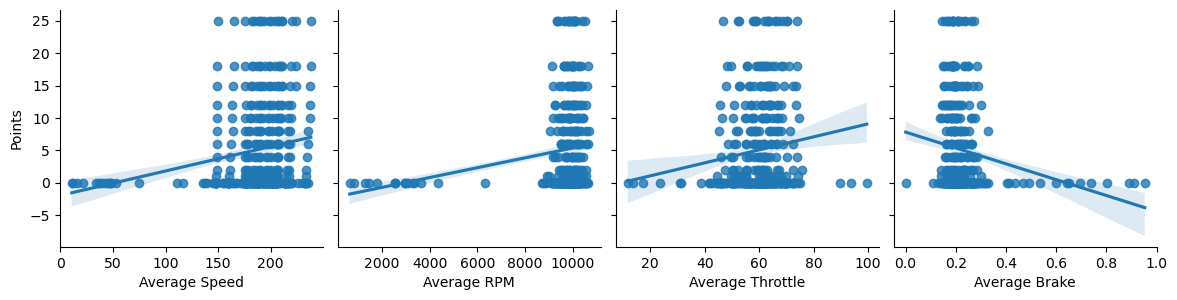

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/Users/ravisolanki/Desktop/2018race_PTS.csv')


X = df[['Average Speed','Average Throttle', 'Average Brake']]
y = df['Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the R^2 score to evaluate the model
r2 = r2_score(y_test, y_pred)

# Output the R^2 score
print(f'R^2 score: {r2}')

sns.pairplot(df, x_vars=['Average Speed', 'Average RPM', 'Average Throttle', 'Average Brake'], y_vars='Points', height=3, aspect=1, kind='reg')
plt.show()


In [42]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.metrics import r2_score


df = pd.read_csv('/Users/ravisolanki/Desktop/2018race_PTS.csv')
correlation_matrix = df.corr()

print(correlation_matrix)


                  Year  Average Speed  Average RPM  Average Throttle  \
Year               NaN            NaN          NaN               NaN   
Average Speed      NaN       1.000000     0.915920          0.451757   
Average RPM        NaN       0.915920     1.000000          0.205618   
Average Throttle   NaN       0.451757     0.205618          1.000000   
Average Brake      NaN      -0.810648    -0.794222          0.018927   
Points             NaN       0.193672     0.159679          0.127553   
Unnamed: 8         NaN            NaN          NaN               NaN   
Unnamed: 9         NaN            NaN          NaN               NaN   

                  Average Brake    Points  Unnamed: 8  Unnamed: 9  
Year                        NaN       NaN         NaN         NaN  
Average Speed         -0.810648  0.193672         NaN         NaN  
Average RPM           -0.794222  0.159679         NaN         NaN  
Average Throttle       0.018927  0.127553         NaN         NaN  
Average Bra

/var/folders/ly/hd9vyc5x2wg0mx_qv7hprdf80000gn/T/ipykernel_26130/1525615890.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_f1_race_results(url, race_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the results table
    results_table = soup.find('table', class_='resultsarchive-table')
    if not results_table:
        raise ValueError(f"No results table found for {race_name}")

    # Extracting data
    rows = results_table.find_all('tr')[1:]  # Skip the header row
    race_results = []
    for row in rows:
        cols = row.find_all('td')
        if cols:
            driver = cols[3].text.strip()[-3:]
            points = cols[-2].text.strip()  # Points, using -1 to get the last column data
            race_results.append({'Race': race_name, 'Driver': driver, 'Points': points})

    return race_results

# URLs for races from Australia to Abu Dhabi
race_urls = {
    "Australia": "https://www.formula1.com/en/results.html/2019/races/1000/australia/race-result.html",
    "Sakhir": "https://www.formula1.com/en/results.html/2019/races/1020/abu-dhabi/race-result.html",
    "Shanghai": "https://www.formula1.com/en/results.html/2019/races/1002/china/race-result.html",
    "Baku": "https://www.formula1.com/en/results.html/2019/races/1003/azerbaijan/race-result.html",
    "Barcelona": "https://www.formula1.com/en/results.html/2019/races/1004/spain/race-result.html",
    "Monte Carlo": "https://www.formula1.com/en/results.html/2019/races/1005/monaco/race-result.html",
    "Montréal": "https://www.formula1.com/en/results.html/2019/races/1006/canada/race-result.html",
    "Le Castellet": "https://www.formula1.com/en/results.html/2019/races/1007/france/race-result.html",
    "Spielberg": "https://www.formula1.com/en/results.html/2019/races/1008/austria/race-result.html",
    "Silverstone": "https://www.formula1.com/en/results.html/2019/races/1009/great-britain/race-result.html",
    "Hockenheim": "https://www.formula1.com/en/results.html/2019/races/1010/germany/race-result.html",
    "Budapest": "https://www.formula1.com/en/results.html/2019/races/1011/hungary/race-result.html",
    "Spa-Francorchamps": "https://www.formula1.com/en/results.html/2019/races/1012/belgium/race-result.html",
    "Monza": "https://www.formula1.com/en/results.html/2019/races/1013/italy/race-result.html",
    "Singapore": "https://www.formula1.com/en/results.html/2019/races/1014/singapore/race-result.html",
    "Sochi": "https://www.formula1.com/en/results.html/2019/races/1015/russia/race-result.html",
    "Suzuka": "https://www.formula1.com/en/results.html/2019/races/1016/japan/race-result.html",
    "Mexico City": "https://www.formula1.com/en/results.html/2019/races/1017/mexico/race-result.html",
    "Austin": "https://www.formula1.com/en/results.html/2019/races/1018/united-states/race-result.html",
    "São Paulo": "https://www.formula1.com/en/results.html/2019/races/1019/brazil/race-result.html",
    "Yas Island": "https://www.formula1.com/en/results.html/2019/races/1020/abu-dhabi/race-result.html"
    
    # Add other races here if needed
}

# Scrape the data for all races
all_race_results = []
for race_name, race_url in race_urls.items():
    race_results = scrape_f1_race_results(race_url, race_name)
    all_race_results.extend(race_results)

# Create a DataFrame
race_results2019_df = pd.DataFrame(all_race_results)

# Display the DataFrame
print(race_results2019_df)


           Race Driver Points
0     Australia    BOT     26
1     Australia    HAM     18
2     Australia    VER     15
3     Australia    VET     12
4     Australia    LEC     10
..          ...    ...    ...
415  Yas Island    GIO      0
416  Yas Island    RUS      0
417  Yas Island    GAS      0
418  Yas Island    KUB      0
419  Yas Island    STR      0

[420 rows x 3 columns]


In [23]:
race_results2019_df.to_csv('f1_race_results_2019.csv', index=False)

print("The data has been saved to f1_race_results_2019.csv")

The data has been saved to f1_race_results_2019.csv


In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_f1_race_results(url, race_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the results table
    results_table = soup.find('table', class_='resultsarchive-table')
    if not results_table:
        raise ValueError(f"No results table found for {race_name}")

    # Extracting data
    rows = results_table.find_all('tr')[1:]  # Skip the header row
    race_results = []
    for row in rows:
        cols = row.find_all('td')
        if cols:
            driver = cols[3].text.strip()[-3:]
            points = cols[-2].text.strip()  # Points, using -1 to get the last column data
            race_results.append({'Race': race_name, 'Driver': driver, 'Points': points})

    return race_results

# URLs for races from Australia to Abu Dhabi
race_urls = {
    "Barcelona": "https://www.formula1.com/en/results.html/2020/races/1050/spain/race-result.html",
    
    "Spielberg": "https://www.formula1.com/en/results.html/2020/races/1045/austria/race-result.html",
    "Budapest": "https://www.formula1.com/en/results.html/2020/races/1047/hungary/race-result.html",
    
    
    
    "Silverstone": "https://www.formula1.com/en/results.html/2020/races/1048/great-britain/race-result.html",
    "Spa-Francorchamps": "https://www.formula1.com/en/results.html/2020/races/1051/belgium/race-result.html",
    "Monza": "https://www.formula1.com/en/results.html/2020/races/1052/italy/race-result.html",
    "Mugello": "https://www.formula1.com/en/results.html/2020/races/1053/italy/race-result.html",
    "Sochi": "https://www.formula1.com/en/results.html/2020/races/1054/russia/race-result.html",
    "Nürburgring": "https://www.formula1.com/en/results.html/2020/races/1055/germany/race-result.html",
    "Portimão": "https://www.formula1.com/en/results.html/2020/races/1056/portugal/race-result.html",
    "Imola": "https://www.formula1.com/en/results.html/2020/races/1057/italy/race-result.html",
    "Istabul": "https://www.formula1.com/en/results.html/2020/races/1058/turkey/race-result.html",
    "Sakhir": "https://www.formula1.com/en/results.html/2020/races/1060/bahrain/race-result.html",
    "Yas Island": "https://www.formula1.com/en/results.html/2020/races/1061/abu-dhabi/race-result.html"
    
    # Add other races here if needed
}

# Scrape the data for all races
all_race_results = []
for race_name, race_url in race_urls.items():
    race_results = scrape_f1_race_results(race_url, race_name)
    all_race_results.extend(race_results)

# Create a DataFrame
race_results2020_df = pd.DataFrame(all_race_results)

# Display the DataFrame
print(race_results2020_df)


           Race Driver Points
0     Barcelona    HAM     25
1     Barcelona    VER     18
2     Barcelona    BOT     16
3     Barcelona    STR     12
4     Barcelona    PER     10
..          ...    ...    ...
275  Yas Island    GIO      0
276  Yas Island    LAT      0
277  Yas Island    MAG      0
278  Yas Island    FIT      0
279  Yas Island    PER      0

[280 rows x 3 columns]


In [26]:
race_results2020_df.to_csv('f1_race_results_2020.csv', index=False)

print("The data has been saved to f1_race_results_2020.csv")

The data has been saved to f1_race_results_2020.csv


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_f1_race_results(url, race_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the results table
    results_table = soup.find('table', class_='resultsarchive-table')
    if not results_table:
        raise ValueError(f"No results table found for {race_name}")

    # Extracting data
    rows = results_table.find_all('tr')[1:]  # Skip the header row
    race_results = []
    for row in rows:
        cols = row.find_all('td')
        if cols:
            driver = cols[3].text.strip()[-3:]
            points = cols[-2].text.strip()  # Points, using -1 to get the last column data
            race_results.append({'Race': race_name, 'Driver': driver, 'Points': points})

    return race_results

# URLs for races from Australia to Abu Dhabi
race_urls = {
    "Sakhir": "https://www.formula1.com/en/results.html/2021/races/1064/bahrain/race-result.html",
    
    "Imola": "https://www.formula1.com/en/results.html/2021/races/1065/italy/race-result.html",
    "Portimão": "https://www.formula1.com/en/results.html/2021/races/1066/portugal/race-result.html",
    
    
    
    "Barcelona": "https://www.formula1.com/en/results.html/2021/races/1086/spain/race-result.html",
    "Monte Carlo": "https://www.formula1.com/en/results.html/2021/races/1067/monaco/race-result.html",
    "Baku": "https://www.formula1.com/en/results.html/2021/races/1068/azerbaijan/race-result.html",
    "Le Castellet": "https://www.formula1.com/en/results.html/2021/races/1070/france/race-result.html",
    "Silverstone": "https://www.formula1.com/en/results.html/2021/races/1072/great-britain/race-result.html",
    "Budapest": "https://www.formula1.com/en/results.html/2021/races/1073/hungary/race-result.html",
    "Spa-Francorchamps": "https://www.formula1.com/en/results.html/2021/races/1074/belgium/race-result.html",
    "Zandvoort": "https://www.formula1.com/en/results.html/2021/races/1075/netherlands/race-result.html",
    "Monza": "https://www.formula1.com/en/results.html/2021/races/1076/italy/race-result.html",
    "Sochi": "https://www.formula1.com/en/results.html/2021/races/1077/russia/race-result.html",
    "Istanbul": "https://www.formula1.com/en/results.html/2021/races/1078/turkey/race-result.html",
    "Austin": "https://www.formula1.com/en/results.html/2021/races/1102/united-states/race-result.html",
    "Mexico City": "https://www.formula1.com/en/results.html/2021/races/1103/mexico/race-result.html",
    "São Paulo": "https://www.formula1.com/en/results.html/2021/races/1104/brazil/race-result.html",
    "Lusail": "https://www.formula1.com/en/results.html/2021/races/1105/qatar/race-result.html",
    "Jeddah": "https://www.formula1.com/en/results.html/2021/races/1106/saudi-arabia/race-result.html",
    "Yas Island": "https://www.formula1.com/en/results.html/2021/races/1107/abu-dhabi/race-result.html"
    
    # Add other races here if needed
}

# Scrape the data for all races
all_race_results = []
for race_name, race_url in race_urls.items():
    race_results = scrape_f1_race_results(race_url, race_name)
    all_race_results.extend(race_results)

# Create a DataFrame
race_results2021_df = pd.DataFrame(all_race_results)

# Display the DataFrame
print(race_results2021_df)


           Race Driver Points
0        Sakhir    HAM     25
1        Sakhir    VER     18
2        Sakhir    BOT     16
3        Sakhir    NOR     12
4        Sakhir    PER     10
..          ...    ...    ...
395  Yas Island    LAT      0
396  Yas Island    GIO      0
397  Yas Island    RUS      0
398  Yas Island    RAI      0
399  Yas Island    MAZ      0

[400 rows x 3 columns]


In [28]:
race_results2021_df.to_csv('f1_race_results_2021.csv', index=False)

print("The data has been saved to f1_race_results_2021.csv")

The data has been saved to f1_race_results_2021.csv


In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def scrape_f1_race_results(url, race_name):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the results table
    results_table = soup.find('table', class_='resultsarchive-table')
    if not results_table:
        raise ValueError(f"No results table found for {race_name}")

    # Extracting data
    rows = results_table.find_all('tr')[1:]  # Skip the header row
    race_results = []
    for row in rows:
        cols = row.find_all('td')
        if cols:
            driver = cols[3].text.strip()[-3:]
            points = cols[-2].text.strip()  # Points, using -1 to get the last column data
            race_results.append({'Race': race_name, 'Driver': driver, 'Points': points})

    return race_results

# URLs for races from Australia to Abu Dhabi
race_urls = {
    "Bahrain": "https://www.formula1.com/en/results.html/2022/races/1124/bahrain/race-result.html",
    "Sakhir": "https://www.formula1.com/en/results.html/2022/races/1124/bahrain/race-result.html",
    "Jeddah": "https://www.formula1.com/en/results.html/2022/races/1125/saudi-arabia/race-result.html",
    "Melbourne": "https://www.formula1.com/en/results.html/2022/races/1108/australia/race-result.html",
    "Imola": "https://www.formula1.com/en/results.html/2022/races/1109/italy/race-result.html",
    "Miami": "https://www.formula1.com/en/results.html/2022/races/1110/miami/race-result.html",
    
    
    
    "Barcelona": "https://www.formula1.com/en/results.html/2022/races/1111/spain/race-result.html",
    "Monaco": "https://www.formula1.com/en/results.html/2022/races/1112/monaco/race-result.html",
    "Baku": "https://www.formula1.com/en/results.html/2022/races/1126/azerbaijan/race-result.html",
    "Montréal": "https://www.formula1.com/en/results.html/2022/races/1113/canada/race-result.html",
    "Silverstone": "https://www.formula1.com/en/results.html/2022/races/1114/great-britain/race-result.html",
    "Spielberg": "https://www.formula1.com/en/results.html/2022/races/1115/austria/race-result.html",
    "Le Castellet": "https://www.formula1.com/en/results.html/2022/races/1116/france/race-result.html",
    "Budapest": "https://www.formula1.com/en/results.html/2022/races/1117/hungary/race-result.html",
    "Spa-Francorchamps": "https://www.formula1.com/en/results.html/2022/races/1118/belgium/race-result.html",
    "Zandvoort": "https://www.formula1.com/en/results.html/2022/races/1119/netherlands/race-result.html",
    "Monza": "https://www.formula1.com/en/results.html/2022/races/1120/italy/race-result.html",
    "Marina Bay": "https://www.formula1.com/en/results.html/2022/races/1133/singapore/race-result.html",
    "Suzuka": "https://www.formula1.com/en/results.html/2022/races/1134/japan/race-result.html",
    "Austin": "https://www.formula1.com/en/results.html/2022/races/1135/united-states/race-result.html",
    "Mexico City": "https://www.formula1.com/en/results.html/2022/races/1136/mexico/race-result.html",
    "São Paulo": "https://www.formula1.com/en/results.html/2022/races/1137/brazil/race-result.html",
    "Yas Island": "https://www.formula1.com/en/results.html/2022/races/1138/abu-dhabi/race-result.html"
    
    # Add other races here if needed
}

# Scrape the data for all races
all_race_results = []
for race_name, race_url in race_urls.items():
    race_results = scrape_f1_race_results(race_url, race_name)
    all_race_results.extend(race_results)

# Create a DataFrame
race_results2022_df = pd.DataFrame(all_race_results)

# Display the DataFrame
print(race_results2022_df)


           Race Driver Points
0       Bahrain    LEC     26
1       Bahrain    SAI     18
2       Bahrain    HAM     15
3       Bahrain    RUS     12
4       Bahrain    MAG     10
..          ...    ...    ...
455  Yas Island    MSC      0
456  Yas Island    MAG      0
457  Yas Island    HAM      0
458  Yas Island    LAT      0
459  Yas Island    ALO      0

[460 rows x 3 columns]


In [30]:
race_results2022_df.to_csv('f1_race_results_2022.csv', index=False)

print("The data has been saved to f1_race_results_2022.csv")

The data has been saved to f1_race_results_2022.csv
